# Import Libraries

In [67]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [71]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, )
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0, )

### Explore Data

In [74]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [76]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [78]:
loan_data_inputs_train.shape

(373028, 324)

In [80]:
loan_data_targets_train.shape

(373028, 1)

In [82]:
loan_data_inputs_test.shape

(93257, 324)

In [84]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [87]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [89]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [91]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train = inputs_train.astype(int)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [93]:
# # Convert boolean (True/False) values to integers (1/0)
# inputs_train = inputs_train.astype(int)

# # Display the first few rows to verify the conversion
# inputs_train.head()

# PD Model Estimation

## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [99]:
reg = LogisticRegression(random_state=None, C=1.0, class_weight=None, solver='liblinear',)
#reg = LogisticRegression(solver='warn')

# We create an instance of an object from the 'LogisticRegression' class.

In [101]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [103]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [104]:
reg.intercept_

array([-1.68415101])

In [107]:
reg.coef_

array([[ 1.11434994,  0.88495647,  0.68889268,  0.49796386,  0.32135055,
         0.13380636,  0.0917446 ,  0.10639721,  0.03491415,  0.05713565,
         0.05868179,  0.06098727,  0.07621932,  0.13467575,  0.09841809,
         0.1830557 ,  0.23724338,  0.22338052,  0.26169498,  0.31984391,
         0.52310425,  0.08775908, -0.00829479,  0.30631791,  0.20241935,
         0.21542487,  0.26895817,  0.0545602 ,  0.07971375,  0.09975251,
         0.12474459,  0.08969781,  0.05939225,  0.12283576,  0.96657908,
         0.78882034,  0.70739334,  0.5238954 ,  0.36860941,  0.12477995,
        -0.07546123,  0.88241888,  0.54620993,  0.29884268,  0.11038543,
         0.03304543,  0.03247742,  0.08087998,  0.11074902,  0.11091659,
         0.08642581,  0.04405163,  0.64518237,  0.50180496,  0.2929664 ,
         0.33506319,  0.23716571,  0.20954614,  0.19161005,  0.18954709,
         0.22083701,  0.1368978 ,  0.12714033,  0.1632517 , -0.02081879,
         0.02549966,  0.20355298,  0.04442262,  0.0

In [109]:
feature_name = inputs_train.columns.values

In [111]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-1.684151
1,grade:A,1.114350
2,grade:B,0.884956
3,grade:C,0.688893
4,grade:D,0.497964
5,grade:E,0.321351
6,grade:F,0.133806
7,home_ownership:OWN,0.091745
8,home_ownership:MORTGAGE,0.106397
9,addr_state:NM_VA,0.034914


# Build a Logistic Regression Model with P-Values

In [114]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [116]:
reg = LogisticRegression_with_p_values(random_state=42, C=1.0, class_weight=None, solver='liblinear')

In [118]:
reg.fit(inputs_train, loan_data_targets_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.684151
1,grade:A,1.114350
2,grade:B,0.884956
3,grade:C,0.688893
4,grade:D,0.497964
5,grade:E,0.321351
6,grade:F,0.133806
7,home_ownership:OWN,0.091745
8,home_ownership:MORTGAGE,0.106397
9,addr_state:NM_VA,0.034914


In [120]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [121]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [122]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [123]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.684151,NaN
1,grade:A,1.114350,1.680638e-34
2,grade:B,0.884956,3.113331e-47
3,grade:C,0.688893,7.767468e-34
4,grade:D,0.497964,2.685565e-20
5,grade:E,0.321351,2.553113e-11
6,grade:F,0.133806,7.699643e-03
7,home_ownership:OWN,0.091745,5.458043e-06
8,home_ownership:MORTGAGE,0.106397,5.428655e-17
9,addr_state:NM_VA,0.034914,2.762875e-01


In [124]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [125]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [126]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train = inputs_train.astype(int)
inputs_train.head()


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [127]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values(random_state=42, C=0.56, class_weight=None, solver='liblinear')
reg2.fit(inputs_train, loan_data_targets_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
feature_name = inputs_train.columns.values

In [129]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.338106
1,grade:A,1.104919
2,grade:B,0.876466
3,grade:C,0.680758
4,grade:D,0.490235
5,grade:E,0.314928
6,grade:F,0.127694
7,home_ownership:OWN,0.094215
8,home_ownership:MORTGAGE,0.106110
9,addr_state:NM_VA,0.035873


In [130]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,-1.338106,NaN
1,grade:A,1.104919,5.327895e-34
2,grade:B,0.876466,1.332460e-46
3,grade:C,0.680758,2.276665e-33
4,grade:D,0.490235,5.322764e-20
5,grade:E,0.314928,2.827601e-11
6,grade:F,0.127694,9.370989e-03
7,home_ownership:OWN,0.094215,2.904524e-06
8,home_ownership:MORTGAGE,0.106110,4.818509e-17
9,addr_state:NM_VA,0.035873,2.626814e-01


In [131]:
import pickle

In [132]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

## PD model Validation (test)

### Out-of-sample validation

In [135]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [139]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [146]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test = inputs_test.astype(int)
inputs_test.head()


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [147]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [148]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1])

In [149]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [150]:
y_hat_test_proba

array([[0.0795457 , 0.9204543 ],
       [0.13749663, 0.86250337],
       [0.11370462, 0.88629538],
       ...,
       [0.02346498, 0.97653502],
       [0.04154803, 0.95845197],
       [0.04903288, 0.95096712]])

In [151]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.9204543 , 0.86250337, 0.88629538, ..., 0.97653502, 0.95845197,
       0.95096712])

In [152]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [168]:
y_hat_test_proba

array([0.9204543 , 0.86250337, 0.88629538, ..., 0.97653502, 0.95845197,
       0.95096712])

In [170]:
loan_data_targets_test_temp = loan_data_targets_test

In [172]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True) # We reset the index of a dataframe.

In [174]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1) # Concatenates two dataframes.

In [176]:
df_actual_predicted_probs.shape

(93257, 2)

In [178]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [180]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [182]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.920454
288564,1,0.862503
213591,1,0.886295
263083,1,0.935434
165001,1,0.967651


### Accuracy and AUC

In [185]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [187]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,7358,2832
1,35780,47287


In [189]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.078900,0.030368
1,0.383671,0.507061


In [191]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.5859613755535777

In [193]:
from sklearn.metrics import roc_curve, roc_auc_score

In [195]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99950932, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.80577124e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([       inf, 0.99195791, 0.99027076, ..., 0.49311349, 0.39915024,
        0.38158575]))

In [197]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

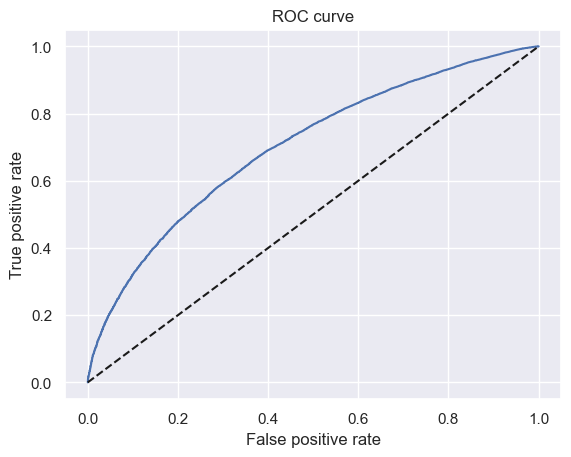

In [200]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [202]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7018208914040599

### Gini and Kolmogorov-Smirnov

In [206]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [208]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.381586,0
42344,1,0.396431,0
39810,0,0.399150,0
40518,0,0.456206,0
42396,0,0.456824,0


In [210]:
df_actual_predicted_probs.tail()


,loan_data_targets_test,y_hat_test_proba,y_hat_test
239228,1,0.990962,1
266566,1,0.991237,1
261086,1,0.991257,1
302494,1,0.991318,1
242624,1,0.991958,1


In [212]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [214]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.381586,0
1,42344,1,0.396431,0
2,39810,0,0.399150,0
3,40518,0,0.456206,0
4,42396,0,0.456824,0


In [216]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [218]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.381586,0,1,1,0
1,42344,1,0.396431,0,2,2,0
2,39810,0,0.399150,0,3,2,1
3,40518,0,0.456206,0,4,2,2
4,42396,0,0.456824,0,5,2,3


In [219]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [222]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.381586,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.396431,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.399150,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.456206,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.456824,0,5,2,3,0.000054,0.000024,0.000294


In [224]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,239228,1,0.990962,1,93253,83063,10190,0.999957,0.999952,1.0
93253,266566,1,0.991237,1,93254,83064,10190,0.999968,0.999964,1.0
93254,261086,1,0.991257,1,93255,83065,10190,0.999979,0.999976,1.0
93255,302494,1,0.991318,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.991958,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

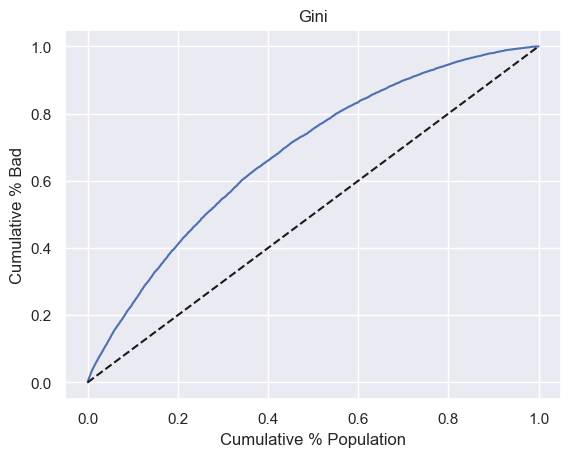

In [226]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [228]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.4036417828081198

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

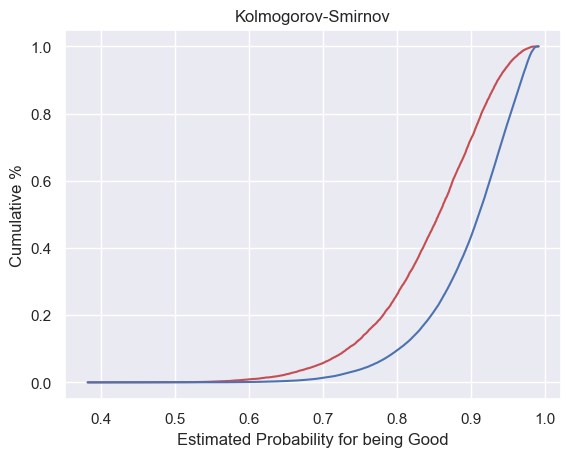

In [230]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [231]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.29438603145623976

### Calibration


In [233]:
from sklearn.isotonic import IsotonicRegression
from sklearn.calibration import calibration_curve

In [236]:
ir = IsotonicRegression(out_of_bounds='clip')
y_true = df_actual_predicted_probs['loan_data_targets_test']
y_pred = df_actual_predicted_probs['y_hat_test_proba']

In [239]:
ir.fit(y_pred, y_true)

IsotonicRegression(out_of_bounds='clip')

In [241]:
calibrated_probs = ir.predict(y_pred)

In [243]:
df_actual_predicted_probs['calibrated_proba'] = calibrated_probs

In [245]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

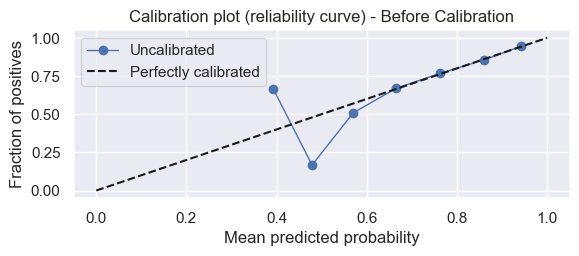

In [247]:
prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=10)
plt.subplot(2, 1, 1)
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Uncalibrated')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot (reliability curve) - Before Calibration')
plt.legend()

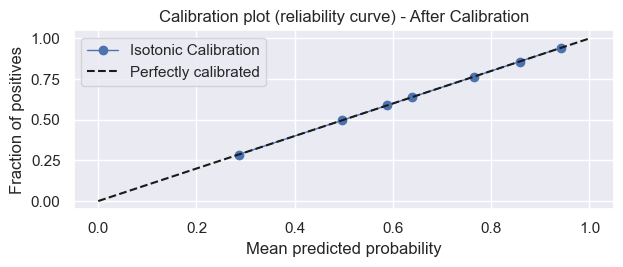

In [249]:
prob_true_cal, prob_pred_cal = calibration_curve(y_true, calibrated_probs, n_bins=10)
plt.subplot(2, 1, 2)
plt.plot(prob_pred_cal, prob_true_cal, marker='o', linewidth=1, label='Isotonic Calibration')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot (reliability curve) - After Calibration')
plt.legend()

plt.tight_layout()
plt.show()

In [251]:
from sklearn.metrics import roc_curve, roc_auc_score

In [253]:
fpr_uncal, tpr_uncal, _ = roc_curve(y_true, y_pred)
auc_uncal = roc_auc_score(y_true, y_pred)

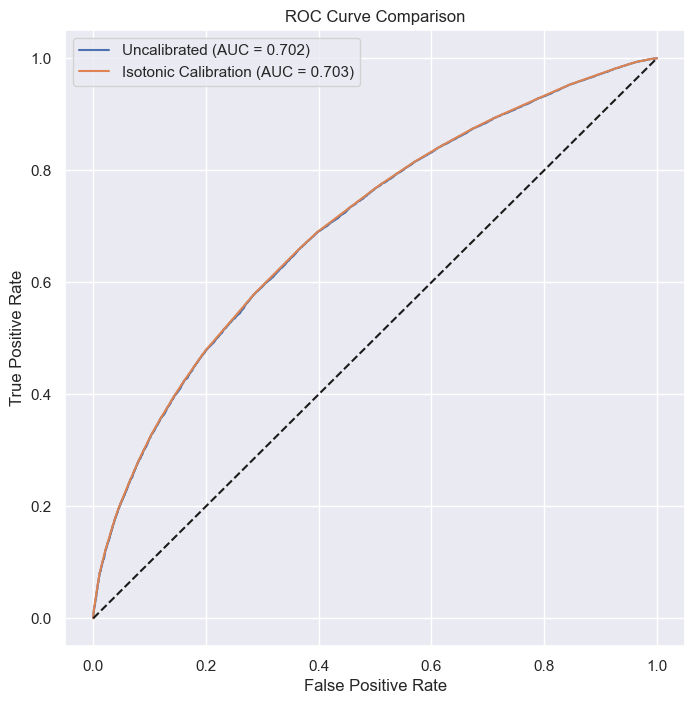

In [255]:
fpr_cal, tpr_cal, _ = roc_curve(y_true, calibrated_probs)
auc_cal = roc_auc_score(y_true, calibrated_probs)

plt.figure(figsize=(8, 8))
plt.plot(fpr_uncal, tpr_uncal, label=f'Uncalibrated (AUC = {auc_uncal:.3f})')
plt.plot(fpr_cal, tpr_cal, label=f'Isotonic Calibration (AUC = {auc_cal:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [257]:
AUROC_cal = roc_auc_score(y_true, calibrated_probs)
Gini_cal = AUROC_cal * 2 - 1
print(f"Gini before calibration: {Gini}")
print(f"Gini after calibration: {Gini_cal}")

Gini before calibration: 0.4036417828081198
Gini after calibration: 0.4057874678955786


In [259]:
df_cal = df_actual_predicted_probs.copy()
df_cal = df_cal.sort_values('calibrated_proba')

In [261]:
df_cal['Cumulative N Population'] = df_cal.index + 1
df_cal['Cumulative N Good'] = df_cal['loan_data_targets_test'].cumsum()
df_cal['Cumulative N Bad'] = df_cal['Cumulative N Population'] - df_cal['Cumulative N Good']

df_cal['Cumulative Perc Population'] = df_cal['Cumulative N Population'] / df_cal.shape[0]
df_cal['Cumulative Perc Good'] = df_cal['Cumulative N Good'] / df_cal['loan_data_targets_test'].sum()
df_cal['Cumulative Perc Bad'] = df_cal['Cumulative N Bad'] / (df_cal.shape[0] - df_cal['loan_data_targets_test'].sum())

In [263]:
KS_cal = max(df_cal['Cumulative Perc Bad'] - df_cal['Cumulative Perc Good'])
print(f"KS before calibration: {KS}")
print(f"KS after calibration: {KS_cal}")

KS before calibration: 0.29438603145623976
KS after calibration: 0.9239170118808644


In [265]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [267]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [269]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.338106,NaN
1,grade:A,1.104919,5.327895e-34
2,grade:B,0.876466,1.332460e-46
3,grade:C,0.680758,2.276665e-33
4,grade:D,0.490235,5.322764e-20
5,grade:E,0.314928,2.827601e-11
6,grade:F,0.127694,9.370989e-03
7,home_ownership:OWN,0.094215,2.904524e-06
8,home_ownership:MORTGAGE,0.106110,4.818509e-17
9,addr_state:NM_VA,0.035873,2.626814e-01


In [271]:
y_hat_test_proba

array([0.9204543 , 0.86250337, 0.88629538, ..., 0.97653502, 0.95845197,
       0.95096712])

### Creating a Scorecard


In [274]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.338106,NaN
1,grade:A,1.104919,5.327895e-34
2,grade:B,0.876466,1.332460e-46
3,grade:C,0.680758,2.276665e-33
4,grade:D,0.490235,5.322764e-20
5,grade:E,0.314928,2.827601e-11
6,grade:F,0.127694,9.370989e-03
7,home_ownership:OWN,0.094215,2.904524e-06
8,home_ownership:MORTGAGE,0.106110,4.818509e-17
9,addr_state:NM_VA,0.035873,2.626814e-01


In [275]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [278]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [279]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.338106,NaN
1,1,grade:A,1.104919,5.327895e-34
2,2,grade:B,0.876466,1.332460e-46
3,3,grade:C,0.680758,2.276665e-33
4,4,grade:D,0.490235,5.322764e-20
5,5,grade:E,0.314928,2.827601e-11
6,6,grade:F,0.127694,9.370989e-03
7,7,home_ownership:OWN,0.094215,2.904524e-06
8,8,home_ownership:MORTGAGE,0.106110,4.818509e-17
9,9,addr_state:NM_VA,0.035873,2.626814e-01


In [282]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.338106,NaN,Intercept
1,1,grade:A,1.104919,5.327895e-34,grade
2,2,grade:B,0.876466,1.332460e-46,grade
3,3,grade:C,0.680758,2.276665e-33,grade
4,4,grade:D,0.490235,5.322764e-20,grade
5,5,grade:E,0.314928,2.827601e-11,grade
6,6,grade:F,0.127694,9.370989e-03,grade
7,7,home_ownership:OWN,0.094215,2.904524e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.106110,4.818509e-17,home_ownership
9,9,addr_state:NM_VA,0.035873,2.626814e-01,addr_state


In [284]:
min_score = 300
max_score = 850

In [286]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Intercept                     -1.338106
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.082056
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.079346
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.008959
Name: Coefficients, dtype: float64

In [288]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-1.5084659194133807

In [290]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                     -1.338106
acc_now_delinq                 0.190601
addr_state                     0.522582
annual_inc                     0.558473
dti                            0.379270
emp_length                     0.124530
grade                          1.104919
home_ownership                 0.106110
initial_list_status            0.055689
inq_last_6mths                 0.655657
int_rate                       0.896075
mths_since_earliest_cr_line    0.115205
mths_since_issue_d             0.970682
mths_since_last_delinq         0.187176
mths_since_last_record         0.509514
purpose                        0.303211
term                           0.078136
verification_status            0.084416
Name: Coefficients, dtype: float64

In [292]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

5.504139628980381

In [294]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.338106,NaN,Intercept,-104.947876
1,1,grade:A,1.104919,5.327895e-34,grade,86.659002
2,2,grade:B,0.876466,1.332460e-46,grade,68.741414
3,3,grade:C,0.680758,2.276665e-33,grade,53.392014
4,4,grade:D,0.490235,5.322764e-20,grade,38.449187
5,5,grade:E,0.314928,2.827601e-11,grade,24.699887
6,6,grade:F,0.127694,9.370989e-03,grade,10.015067
7,7,home_ownership:OWN,0.094215,2.904524e-06,home_ownership,7.389320
8,8,home_ownership:MORTGAGE,0.106110,4.818509e-17,home_ownership,8.322228
9,9,addr_state:NM_VA,0.035873,2.626814e-01,addr_state,2.813516


In [296]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

/var/folders/5s/m4l3npts7zl71jrsv_6jqbwr0000gn/T/ipykernel_22151/1410049194.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.338106,NaN,Intercept,313.361396
1,1,grade:A,1.104919,5.327895e-34,grade,86.659002
2,2,grade:B,0.876466,1.332460e-46,grade,68.741414
3,3,grade:C,0.680758,2.276665e-33,grade,53.392014
4,4,grade:D,0.490235,5.322764e-20,grade,38.449187
5,5,grade:E,0.314928,2.827601e-11,grade,24.699887
6,6,grade:F,0.127694,9.370989e-03,grade,10.015067
7,7,home_ownership:OWN,0.094215,2.904524e-06,home_ownership,7.389320
8,8,home_ownership:MORTGAGE,0.106110,4.818509e-17,home_ownership,8.322228
9,9,addr_state:NM_VA,0.035873,2.626814e-01,addr_state,2.813516


In [298]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.338106,NaN,Intercept,313.361396,313.0
1,1,grade:A,1.104919,5.327895e-34,grade,86.659002,87.0
2,2,grade:B,0.876466,1.332460e-46,grade,68.741414,69.0
3,3,grade:C,0.680758,2.276665e-33,grade,53.392014,53.0
4,4,grade:D,0.490235,5.322764e-20,grade,38.449187,38.0
5,5,grade:E,0.314928,2.827601e-11,grade,24.699887,25.0
6,6,grade:F,0.127694,9.370989e-03,grade,10.015067,10.0
7,7,home_ownership:OWN,0.094215,2.904524e-06,home_ownership,7.389320,7.0
8,8,home_ownership:MORTGAGE,0.106110,4.818509e-17,home_ownership,8.322228,8.0
9,9,addr_state:NM_VA,0.035873,2.626814e-01,addr_state,2.813516,3.0


In [300]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [302]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

In [304]:
# One has to be subtracted from the maximum score for one original variable. We'll evaluate based on differences.

In [306]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.338106,NaN,Intercept,313.361396,313.0,-0.361396
1,1,grade:A,1.104919,5.327895e-34,grade,86.659002,87.0,0.340998
2,2,grade:B,0.876466,1.332460e-46,grade,68.741414,69.0,0.258586
3,3,grade:C,0.680758,2.276665e-33,grade,53.392014,53.0,-0.392014
4,4,grade:D,0.490235,5.322764e-20,grade,38.449187,38.0,-0.449187
5,5,grade:E,0.314928,2.827601e-11,grade,24.699887,25.0,0.300113
6,6,grade:F,0.127694,9.370989e-03,grade,10.015067,10.0,-0.015067
7,7,home_ownership:OWN,0.094215,2.904524e-06,home_ownership,7.389320,7.0,-0.389320
8,8,home_ownership:MORTGAGE,0.106110,4.818509e-17,home_ownership,8.322228,8.0,-0.322228
9,9,addr_state:NM_VA,0.035873,2.626814e-01,addr_state,2.813516,3.0,0.186484


In [308]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

/var/folders/5s/m4l3npts7zl71jrsv_6jqbwr0000gn/T/ipykernel_22151/1528914224.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Final'][77] = 16
/var/folders/5s/m4l3npts7zl71jrsv_6jqbwr0000gn/T/ipykernel_22151/152891422

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.338106,NaN,Intercept,313.361396,313.0,-0.361396,313.0
1,1,grade:A,1.104919,5.327895e-34,grade,86.659002,87.0,0.340998,87.0
2,2,grade:B,0.876466,1.332460e-46,grade,68.741414,69.0,0.258586,69.0
3,3,grade:C,0.680758,2.276665e-33,grade,53.392014,53.0,-0.392014,53.0
4,4,grade:D,0.490235,5.322764e-20,grade,38.449187,38.0,-0.449187,38.0
5,5,grade:E,0.314928,2.827601e-11,grade,24.699887,25.0,0.300113,25.0
6,6,grade:F,0.127694,9.370989e-03,grade,10.015067,10.0,-0.015067,10.0
7,7,home_ownership:OWN,0.094215,2.904524e-06,home_ownership,7.389320,7.0,-0.389320,7.0
8,8,home_ownership:MORTGAGE,0.106110,4.818509e-17,home_ownership,8.322228,8.0,-0.322228,8.0
9,9,addr_state:NM_VA,0.035873,2.626814e-01,addr_state,2.813516,3.0,0.186484,3.0


In [310]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [312]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

851.0

### Caclulating Credit Score

In [315]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [317]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.338106,NaN,Intercept,313.361396,313.0,-0.361396,313.0
1,1,grade:A,1.104919,5.327895e-34,grade,86.659002,87.0,0.340998,87.0
2,2,grade:B,0.876466,1.332460e-46,grade,68.741414,69.0,0.258586,69.0
3,3,grade:C,0.680758,2.276665e-33,grade,53.392014,53.0,-0.392014,53.0
4,4,grade:D,0.490235,5.322764e-20,grade,38.449187,38.0,-0.449187,38.0
5,5,grade:E,0.314928,2.827601e-11,grade,24.699887,25.0,0.300113,25.0
6,6,grade:F,0.127694,9.370989e-03,grade,10.015067,10.0,-0.015067,10.0
7,7,home_ownership:OWN,0.094215,2.904524e-06,home_ownership,7.389320,7.0,-0.389320,7.0
8,8,home_ownership:MORTGAGE,0.106110,4.818509e-17,home_ownership,8.322228,8.0,-0.322228,8.0
9,9,addr_state:NM_VA,0.035873,2.626814e-01,addr_state,2.813516,3.0,0.186484,3.0


In [319]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [321]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [323]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [325]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [327]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,False,False,True,False,False,False,False,True,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,False,False,0,1,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,False,0,0,True,0,True,1,1,0,0,0,0,1,0,0,0,0
288564,1,False,False,False,False,True,False,False,True,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,False,0,0,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,False,0,0,True,0,False,1,0,0,1,0,0,1,0,0,1,0
213591,1,False,False,True,False,False,False,False,True,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,False,True,0,0,False,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,0,0,True,0,True,0,0,0,0,0,0,1,0,0,0,0
263083,1,False,False,True,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,True,0,0,True,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,0,0,False,0,False,1,0,0,0,1,0,1,0,0,0,0
165001,1,True,False,False,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,False,True,0,0,False,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,0,0,True,0,True,0,0,0,0,0,0,1,0,0,0,0


In [329]:
scorecard_scores = df_scorecard['Score - Final']

In [331]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [333]:
scorecard_scores.shape

(102,)

In [335]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [337]:
scorecard_scores.shape

(102, 1)

In [339]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [340]:
y_scores.head()

,0
362514,609.0
288564,561.0
213591,580.0
263083,627.0
165001,686.0


In [343]:
y_scores.tail()

,0
115,571.0
296284,690.0
61777,710.0
91763,664.0
167512,651.0


### From Credit Score to PD

In [346]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [348]:
sum_series = sum_coef_from_score.iloc[:, 0].astype(float)


In [350]:
y_hat_proba_from_score = np.exp(sum_series) / (np.exp(sum_series) + 1)
y_hat_proba_from_score.head()


362514    0.919186
288564    0.860486
213591    0.887113
263083    0.934676
165001    0.968112
Name: 0, dtype: float64

In [352]:
y_hat_test_proba[0: 5]

array([0.9204543 , 0.86250337, 0.88629538, 0.93543361, 0.96765062])

In [354]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.381586
1    0.396431
2    0.399150
3    0.456206
4    0.456824
Name: y_hat_test_proba, dtype: float64

### Setting Cut-offs

In [357]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [359]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7358,2832
1,35780,47287


In [361]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078900,0.030368
1,0.383671,0.507061


In [363]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5859613755535777

In [365]:
from sklearn.metrics import roc_curve, roc_auc_score

In [367]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99950932, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.80577124e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([       inf, 0.99195791, 0.99027076, ..., 0.49311349, 0.39915024,
        0.38158575]))

In [369]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

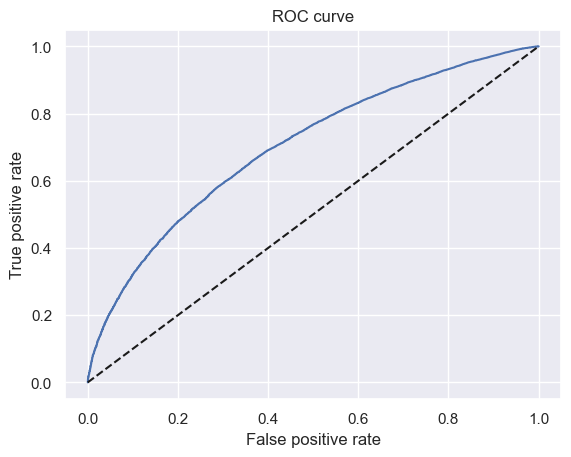

In [373]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [375]:
thresholds

array([       inf, 0.99195791, 0.99027076, ..., 0.49311349, 0.39915024,
       0.38158575])

In [377]:
thresholds.shape

(17365,)

In [379]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [381]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [383]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.991958,0.000000,0.000012
2,0.990271,0.000000,0.000181
3,0.990218,0.000098,0.000181
4,0.989790,0.000098,0.000265


In [385]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

/var/folders/5s/m4l3npts7zl71jrsv_6jqbwr0000gn/T/ipykernel_22151/2460372339.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)


In [387]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [389]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3300.0
1,0.991958,0.000000,0.000012,796.0
2,0.990271,0.000000,0.000181,781.0
3,0.990218,0.000098,0.000181,780.0
4,0.989790,0.000098,0.000265,777.0


In [391]:
df_cutoffs['Score'][0] = max_score

/var/folders/5s/m4l3npts7zl71jrsv_6jqbwr0000gn/T/ipykernel_22151/3137964156.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['Score'][0] = max_score


In [393]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.991958,0.000000,0.000012,796.0
2,0.990271,0.000000,0.000181,781.0
3,0.990218,0.000098,0.000181,780.0
4,0.989790,0.000098,0.000265,777.0


In [395]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17360,0.501467,0.999411,0.999964,419.0
17361,0.494139,0.999509,0.999964,416.0
17362,0.493113,0.999509,0.999976,416.0
17363,0.399150,1.000000,0.999976,386.0
17364,0.381586,1.000000,1.000000,380.0


In [397]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [399]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [400]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.991958,0.000000,0.000012,796.0,1,93256,0.000011,0.999989
2,0.990271,0.000000,0.000181,781.0,15,93242,0.000161,0.999839
3,0.990218,0.000098,0.000181,780.0,16,93241,0.000172,0.999828
4,0.989790,0.000098,0.000265,777.0,23,93234,0.000247,0.999753


In [401]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17360,0.501467,0.999411,0.999964,419.0,93248,9,0.999903,0.000097
17361,0.494139,0.999509,0.999964,416.0,93249,8,0.999914,0.000086
17362,0.493113,0.999509,0.999976,416.0,93250,7,0.999925,0.000075
17363,0.399150,1.000000,0.999976,386.0,93255,2,0.999979,0.000021
17364,0.381586,1.000000,1.000000,380.0,93257,0,1.000000,0.000000


In [405]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.904144,0.258292,0.543609,594.0,47788,45469,0.512433,0.487567
5001,0.904143,0.258391,0.543609,594.0,47789,45468,0.512444,0.487556
5002,0.904130,0.258391,0.543694,594.0,47796,45461,0.512519,0.487481
5003,0.904128,0.258489,0.543694,594.0,47797,45460,0.512530,0.487470
5004,0.904120,0.258489,0.543730,594.0,47800,45457,0.512562,0.487438
5005,0.904118,0.258783,0.543730,594.0,47803,45454,0.512594,0.487406
5006,0.904110,0.258783,0.543778,594.0,47807,45450,0.512637,0.487363
5007,0.904108,0.258881,0.543778,594.0,47808,45449,0.512648,0.487352
5008,0.904071,0.258881,0.544055,594.0,47831,45426,0.512894,0.487106
5009,0.904069,0.258979,0.544055,594.0,47832,45425,0.512905,0.487095


In [406]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953229,0.048577,0.205256,655.0,17545,75712,0.188136,0.811864
1001,0.953224,0.048577,0.205292,655.0,17548,75709,0.188168,0.811832
1002,0.953222,0.048675,0.205292,655.0,17549,75708,0.188179,0.811821
1003,0.953215,0.048675,0.205364,655.0,17555,75702,0.188243,0.811757
1004,0.953214,0.048773,0.205364,655.0,17556,75701,0.188254,0.811746
1005,0.953202,0.048773,0.205400,655.0,17559,75698,0.188286,0.811714
1006,0.953202,0.048871,0.205400,655.0,17560,75697,0.188297,0.811703
1007,0.953197,0.048871,0.205449,655.0,17564,75693,0.188340,0.811660
1008,0.953194,0.048970,0.205449,655.0,17565,75692,0.188350,0.811650
1009,0.953160,0.048970,0.205557,655.0,17574,75683,0.188447,0.811553


In [409]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [410]:
df_scorecard.to_csv('df_scorecard.csv')